In [2]:
import os
os.chdir("D:\\github\\vn_backtester")
os.getcwd()

'D:\\github\\vn_backtester'

In [98]:
import pandas as pd
import numpy as np

__closepath__ = 'data/vn_stock/price_volume/close_matrix_20120101-20240101.txt'
__openpath__ = 'data/vn_stock/price_volume/open_matrix_20120101-20240101.txt'
__highpath__ = 'data/vn_stock/price_volume/high_matrix_20120101-20240101.txt'
__lowpath__ = 'data/vn_stock/price_volume/low_matrix_20120101-20240101.txt'
__volumepath = 'data/vn_stock/price_volume/volume_matrix_20120101-20240101.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__) 
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

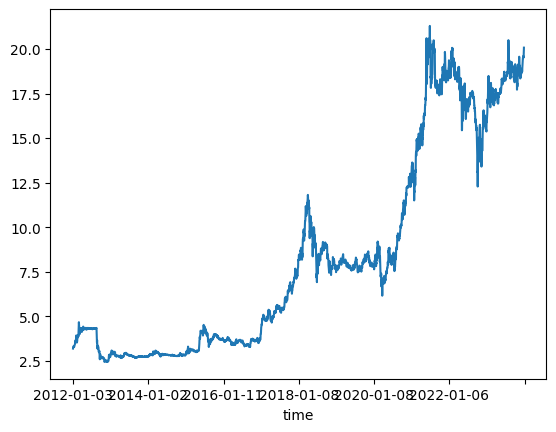

In [93]:
final_close = close.copy()

for column in close.columns:
    first_positive_index = close[column].gt(0).idxmax()
    if pd.notna(first_positive_index):
        outliers = (close.index > first_positive_index) & (close[column] == 0)
        final_close[column] = close[column].where(~outliers, np.nan)
    final_close[column] = final_close[column].fillna(method='ffill')

final_close['ACB'].plot()
final_close.to_csv('data/vn_stock/price_volume/close_matrix_20120101-20240101.txt', sep='\t')

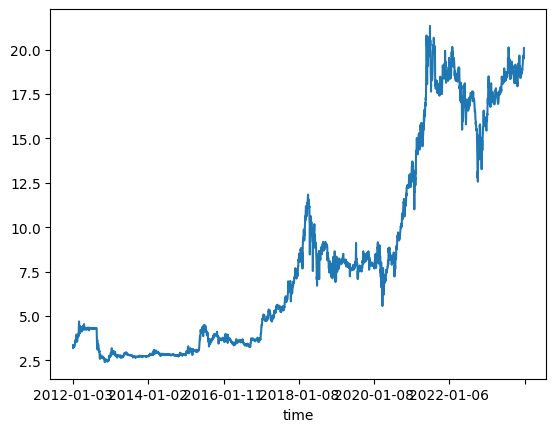

In [94]:
final_open = open.copy()

for column in open.columns:
    first_positive_index = open[column].gt(0).idxmax()
    if pd.notna(first_positive_index):
        outliers = (open.index > first_positive_index) & (open[column] == 0)
        final_open[column] = open[column].where(~outliers, np.nan)
    final_open[column] = final_open[column].fillna(method='ffill')

final_open['ACB'].plot()
final_open.to_csv('data/vn_stock/price_volume/open_matrix_20120101-20240101.txt', sep='\t')

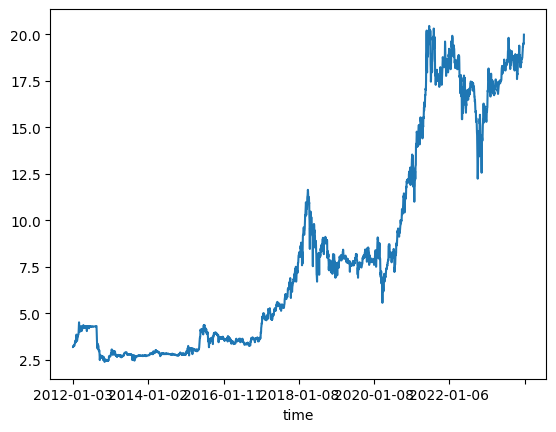

In [95]:
final_low = low.copy()

for column in low.columns:
    first_positive_index = low[column].gt(0).idxmax()
    if pd.notna(first_positive_index):
        outliers = (low.index > first_positive_index) & (low[column] == 0)
        final_low[column] = low[column].where(~outliers, np.nan)
    final_low[column] = final_low[column].fillna(method='ffill')

final_low['ACB'].plot()
final_low.to_csv('data/vn_stock/price_volume/low_matrix_20120101-20240101.txt', sep='\t')

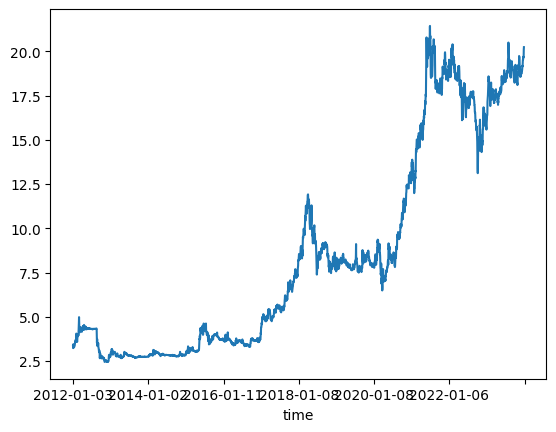

In [96]:
final_high = high.copy()

for column in high.columns:
    first_positive_index = high[column].gt(0).idxmax()
    if pd.notna(first_positive_index):
        outliers = (high.index > first_positive_index) & (high[column] == 0)
        final_high[column] = high[column].where(~outliers, np.nan)
    final_high[column] = final_high[column].fillna(method='ffill')

final_high['ACB'].plot()
final_high.to_csv('data/vn_stock/price_volume/high_matrix_20120101-20240101.txt', sep='\t')

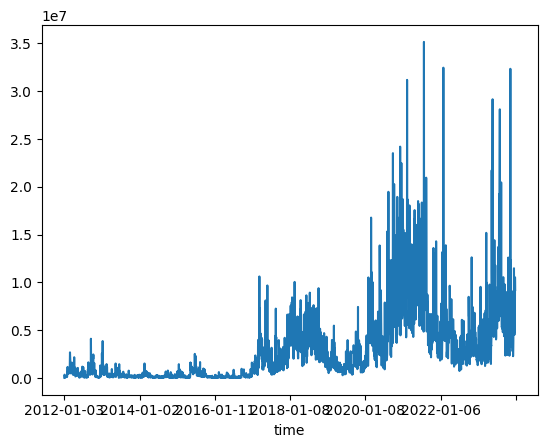

In [97]:
final_vol = volume.copy()

for column in volume.columns:
    first_positive_index = volume[column].gt(0).idxmax()
    if pd.notna(first_positive_index):
        outliers = (volume.index > first_positive_index) & (volume[column] == 0)
        final_vol[column] = volume[column].where(~outliers, np.nan)
    final_vol[column] = final_vol[column].fillna(method='ffill')

final_vol['ACB'].plot()
final_vol.to_csv('data/vn_stock/price_volume/volume_matrix_20120101-20240101.txt', sep='\t')

## Test Operators

In [51]:
from utils.operators import *
ts_partial_corr(close, high, open,4)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_28684\2346765299.py", line 2, in <module>
    ts_partial_corr(close, high, open,4)
  File "D:\github\vn_backtester\utils\operators.py", line 815, in ts_partial_corr
  File "D:\github\vn_backtester\utils\operators.py", line 806, in partial_corr
    if dense:
  File "<__array_function__ internals>", line 200, in polyfit
  File "c:\Users\HP\anaconda3\envs\min_ds-env\lib\site-packages\numpy\lib\polynomial.py", line 636, in polyfit
    raise TypeError("expected 1D vector for x")
TypeError: expected 1D vector for x

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtra

# VN30

In [100]:
volume.index = pd.to_datetime(volume.index)

volume['Year'] = volume.index.year
yearly_sum = volume.groupby('Year').sum()
top_30_tickers = yearly_sum.apply(lambda x: x.nlargest(30).index.tolist(), axis=1)
top_30_tickers_df = pd.DataFrame(top_30_tickers.tolist(), index=top_30_tickers.index, columns=[f'top_{i+1}' for i in range(30)])
top_30_tickers_df

,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,...,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30
Year,,,,,,,,,,,,,,,,,,,,,
2012,PVX,VND,SHB,SCR,ITA,MBB,SSI,SAM,EIB,STB,...,WSS,SBS,SHN,APS,DCS,BVS,HAG,NVT,PXL,ASM
2013,SHB,PVX,ITA,SCR,FLC,HQC,PVT,VCG,VND,REE,...,HAR,CTG,VNE,TLH,PVL,VSH,DLG,DCS,PET,MCG
2014,FLC,PVX,ITA,KLF,SHB,SCR,SSI,HQC,HAG,OGC,...,HAR,SHN,VND,MBB,LCG,HUT,REE,CII,ASM,PET
2015,FLC,KLF,OGC,CII,FIT,DLG,HAI,SCR,SSI,ITA,...,SBT,JVC,PVS,DXG,ASM,HAR,TIG,HPG,VIX,TTF
2016,FLC,ITA,HAG,HQC,SCR,HPG,VHG,KBC,DLG,HHS,...,HSG,VCG,PVD,CII,HKB,BID,PVX,ASM,HUT,TLH
2017,FLC,SHB,HQC,ITA,KLF,HAG,OGC,HPG,STB,DXG,...,ASM,PVS,HSG,PVX,HHS,VCG,ACB,SBT,DCM,CTG
2018,SHB,STB,FLC,HAG,MBB,CTG,PVS,HPG,SSI,SVH,...,OGC,BID,PVD,ITA,HNG,HDB,NQB,VCB,LPB,VRE
2019,ROS,FLC,HPG,MBB,CTG,STB,SHB,HSG,ITA,DLG,...,SCR,POW,VPB,AMD,TCB,HBC,BSR,HAI,ACB,SSI
2020,STB,HPG,FLC,ROS,ITA,HSG,HQC,MBB,TCB,CTG,...,VPB,TCH,GEX,DXG,LDG,HUT,PVX,BSR,AMD,HAI


## volume

In [101]:
volume_top30 = volume.copy()

for year in top_30_tickers_df.index:
    tickers_for_year = top_30_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_30 = [ticker for ticker in volume.columns if ticker not in tickers_for_year]
    volume_top30.loc[volume.index.year == year, tickers_not_in_top_30] = 0
    volume_top30 = volume_top30.drop(columns=['Year'])

volume_top30.to_csv('data/vn_stock/price_volume/volume_matrix_top30_20120101-20240101.txt', sep='\t')

## close

In [102]:
close_top30 = close.copy()
close_top30.index = pd.to_datetime(close_top30.index)

for year in top_30_tickers_df.index.unique():
    tickers_for_year = top_30_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_30 = [ticker for ticker in close.columns if ticker not in tickers_for_year]
    close_top30.loc[close_top30.index.year == year, tickers_not_in_top_30] = 0
close_top30.to_csv('data/vn_stock/price_volume/close_matrix_top30_20120101-20240101.txt', sep='\t')


## open

In [103]:
open_top30 = open.copy()
open_top30.index = pd.to_datetime(open_top30.index)

for year in top_30_tickers_df.index.unique():
    tickers_for_year = top_30_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_30 = [ticker for ticker in open.columns if ticker not in tickers_for_year]
    open_top30.loc[open_top30.index.year == year, tickers_not_in_top_30] = 0
open_top30.to_csv('data/vn_stock/price_volume/open_matrix_top30_20120101-20240101.txt', sep='\t')

## high

In [104]:
high_top30 = high.copy()
high_top30.index = pd.to_datetime(high_top30.index)

for year in top_30_tickers_df.index.unique():
    tickers_for_year = top_30_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_30 = [ticker for ticker in high.columns if ticker not in tickers_for_year]
    high_top30.loc[high_top30.index.year == year, tickers_not_in_top_30] = 0
high_top30.to_csv('data/vn_stock/price_volume/high_matrix_top30_20120101-20240101.txt', sep='\t')

## low

In [105]:
low_top30 = low.copy()
low_top30.index = pd.to_datetime(low_top30.index)

for year in top_30_tickers_df.index.unique():
    tickers_for_year = top_30_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_30 = [ticker for ticker in low.columns if ticker not in tickers_for_year]
    low_top30.loc[low_top30.index.year == year, tickers_not_in_top_30] = 0
low_top30.to_csv('data/vn_stock/price_volume/low_matrix_top30_20120101-20240101.txt', sep='\t')

## load price vol

In [106]:
import pandas as pd
import numpy as np

__closepath__ = 'data/vn_stock/price_volume/close_matrix_top30_20120101-20240101.txt'
__openpath__ = 'data/vn_stock/price_volume/open_matrix_top30_20120101-20240101.txt'
__highpath__ = 'data/vn_stock/price_volume/high_matrix_top30_20120101-20240101.txt'
__lowpath__ = 'data/vn_stock/price_volume/low_matrix_top30_20120101-20240101.txt'
__volumepath = 'data/vn_stock/price_volume/volume_matrix_top30_20120101-20240101.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__)
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

## vwap

In [107]:
price = (high + low + close)/3
vwap = (price * volume).cumsum() / volume.cumsum()
vwap = vwap.round(2)
vwap.fillna(0, inplace=True)
vwap.to_csv('data/vn_stock/price_volume/vwap_matrix_top30_20120101-20240101.txt', sep='\t')

## adv20

In [108]:
adv20 = volume.rolling(window=20).mean()
adv20.fillna(0, inplace=True)
adv20.to_csv('data/vn_stock/price_volume/adv20_matrix_top30_20120101-20240101.txt', sep='\t')

## adv60

In [109]:
adv60 = volume.rolling(window=60).mean()
adv60.fillna(0, inplace=True)
adv60.to_csv('data/vn_stock/price_volume/adv60_matrix_top30_20120101-20240101.txt', sep='\t')

## adv120

In [110]:
adv120 = volume.rolling(window=120).mean()
adv120.fillna(0, inplace=True)
adv120.to_csv('data/vn_stock/price_volume/adv120_matrix_top30_20120101-20240101.txt', sep='\t')

## daily_return

In [111]:
price = (high + low + close)/3
daily_return = price.pct_change()
daily_return.fillna(0, inplace=True)
daily_return.to_csv('data/vn_stock/price_volume/daily_return_matrix_top30_20120101-20240101.txt', sep='\t')

# VN100

In [112]:
import pandas as pd
import numpy as np

__closepath__ = 'data/vn_stock/price_volume/close_matrix_20120101-20240101.txt'
__openpath__ = 'data/vn_stock/price_volume/open_matrix_20120101-20240101.txt'
__highpath__ = 'data/vn_stock/price_volume/high_matrix_20120101-20240101.txt'
__lowpath__ = 'data/vn_stock/price_volume/low_matrix_20120101-20240101.txt'
__volumepath = 'data/vn_stock/price_volume/volume_matrix_20120101-20240101.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__) 
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

In [113]:
volume.index = pd.to_datetime(volume.index)

volume['Year'] = volume.index.year
yearly_sum = volume.groupby('Year').sum()
top100_tickers = yearly_sum.apply(lambda x: x.nlargest(100).index.tolist(), axis=1)
top100_tickers_df = pd.DataFrame(top100_tickers.tolist(), index=top100_tickers.index, columns=[f'top_{i+1}' for i in range(100)])
top100_tickers_df

,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,...,top_91,top_92,top_93,top_94,top_95,top_96,top_97,top_98,top_99,top_100
Year,,,,,,,,,,,,,,,,,,,,,
2012,PVX,VND,SHB,SCR,ITA,MBB,SSI,SAM,EIB,STB,...,DBC,TDH,CTS,BCC,HBC,CMI,DIC,PVD,PXS,PSI
2013,SHB,PVX,ITA,SCR,FLC,HQC,PVT,VCG,VND,REE,...,ORS,HBC,VOS,SJS,SII,HCM,IDJ,VNM,STL,KSD
2014,FLC,PVX,ITA,KLF,SHB,SCR,SSI,HQC,HAG,OGC,...,CTS,KDC,PV2,QPH,HBC,PVG,GAS,GMD,CSM,QCG
2015,FLC,KLF,OGC,CII,FIT,DLG,HAI,SCR,SSI,ITA,...,LCG,NHP,ACM,SHA,BII,PPC,TLH,MHC,IVS,VIP
2016,FLC,ITA,HAG,HQC,SCR,HPG,VHG,KBC,DLG,HHS,...,EVE,AAA,DIG,SAM,MHC,SGO,PVC,FID,KSH,AVF
2017,FLC,SHB,HQC,ITA,KLF,HAG,OGC,HPG,STB,DXG,...,HCM,PPI,DAH,TNI,VJC,GEX,HT1,PVT,LPB,TOP
2018,SHB,STB,FLC,HAG,MBB,CTG,PVS,HPG,SSI,SVH,...,MWG,TNI,NKG,VGT,TLD,JVC,DGW,DVN,HCD,VRC
2019,ROS,FLC,HPG,MBB,CTG,STB,SHB,HSG,ITA,DLG,...,HAR,DGW,PPC,ANV,EVG,NVL,PVT,VIB,BCG,VND
2020,STB,HPG,FLC,ROS,ITA,HSG,HQC,MBB,TCB,CTG,...,TSC,HVN,TPB,DST,TTB,VIX,FRT,HDC,DAH,APG


## volume

In [114]:
volume_top100 = volume.copy()

for year in top100_tickers_df.index:
    tickers_for_year = top100_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top100 = [ticker for ticker in volume.columns if ticker not in tickers_for_year]
    volume_top100.loc[volume.index.year == year, tickers_not_in_top100] = 0
    volume_top100 = volume_top100.drop(columns=['Year'])

volume_top100.to_csv('data/vn_stock/price_volume/volume_matrix_top100_20120101-20240101.txt', sep='\t')

## close

In [115]:
close_top100 = close.copy()
close_top100.index = pd.to_datetime(close_top100.index)

for year in top100_tickers_df.index.unique():
    tickers_for_year = top100_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_100 = [ticker for ticker in close.columns if ticker not in tickers_for_year]
    close_top100.loc[close_top100.index.year == year, tickers_not_in_top_100] = 0
close_top100.to_csv('data/vn_stock/price_volume/close_matrix_top100_20120101-20240101.txt', sep='\t')

## open

In [116]:
open_top100 = open.copy()
open_top100.index = pd.to_datetime(open_top100.index)

for year in top100_tickers_df.index.unique():
    tickers_for_year = top100_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_100 = [ticker for ticker in open.columns if ticker not in tickers_for_year]
    open_top100.loc[open_top100.index.year == year, tickers_not_in_top_100] = 0
open_top100.to_csv('data/vn_stock/price_volume/open_matrix_top100_20120101-20240101.txt', sep='\t')

## high

In [117]:
high_top100 = high.copy()
high_top100.index = pd.to_datetime(high_top100.index)

for year in top100_tickers_df.index.unique():
    tickers_for_year = top100_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_100 = [ticker for ticker in high.columns if ticker not in tickers_for_year]
    high_top100.loc[high_top100.index.year == year, tickers_not_in_top_100] = 0
high_top100.to_csv('data/vn_stock/price_volume/high_matrix_top100_20120101-20240101.txt', sep='\t')

## low

In [118]:
low_top100 = low.copy()
low_top100.index = pd.to_datetime(low_top100.index)

for year in top100_tickers_df.index.unique():
    tickers_for_year = top100_tickers_df.loc[year].dropna().values.tolist()
    tickers_not_in_top_100 = [ticker for ticker in low.columns if ticker not in tickers_for_year]
    low_top100.loc[low_top100.index.year == year, tickers_not_in_top_100] = 0
low_top100.to_csv('data/vn_stock/price_volume/low_matrix_top100_20120101-20240101.txt', sep='\t')

## load price vol

In [119]:
import pandas as pd
import numpy as np

__closepath__ = 'data/vn_stock/price_volume/close_matrix_top100_20120101-20240101.txt'
__openpath__ = 'data/vn_stock/price_volume/open_matrix_top100_20120101-20240101.txt'
__highpath__ = 'data/vn_stock/price_volume/high_matrix_top100_20120101-20240101.txt'
__lowpath__ = 'data/vn_stock/price_volume/low_matrix_top100_20120101-20240101.txt'
__volumepath = 'data/vn_stock/price_volume/volume_matrix_top100_20120101-20240101.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__)
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

## vwap

In [120]:
price = (high + low + close)/3
vwap = (price * volume).cumsum() / volume.cumsum()
vwap = vwap.round(2)
vwap.fillna(0, inplace=True)
vwap.to_csv('data/vn_stock/price_volume/vwap_matrix_top100_20120101-20240101.txt', sep='\t')

## adv20

In [121]:
adv20 = volume.rolling(window=20).mean()
adv20.fillna(0, inplace=True)
adv20.to_csv('data/vn_stock/price_volume/adv20_matrix_top100_20120101-20240101.txt', sep='\t')

## adv60

In [122]:
adv60 = volume.rolling(window=60).mean()
adv60.fillna(0, inplace=True)
adv60.to_csv('data/vn_stock/price_volume/adv60_matrix_top100_20120101-20240101.txt', sep='\t')

## adv120

In [123]:
adv120 = volume.rolling(window=120).mean()
adv120.fillna(0, inplace=True)
adv120.to_csv('data/vn_stock/price_volume/adv120_matrix_top100_20120101-20240101.txt', sep='\t')

## daily_return

In [124]:
price = (high + low + close)/3
daily_return = price.pct_change()
daily_return.fillna(0, inplace=True)
daily_return.to_csv('data/vn_stock/price_volume/daily_return_matrix_top100_20120101-20240101.txt', sep='\t')

# VNALL

In [125]:
import pandas as pd
import numpy as np

__closepath__ = 'data/vn_stock/price_volume/close_matrix_20120101-20240101.txt'
__openpath__ = 'data/vn_stock/price_volume/open_matrix_20120101-20240101.txt'
__highpath__ = 'data/vn_stock/price_volume/high_matrix_20120101-20240101.txt'
__lowpath__ = 'data/vn_stock/price_volume/low_matrix_20120101-20240101.txt'
__volumepath = 'data/vn_stock/price_volume/volume_matrix_20120101-20240101.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__) 
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

## vwap

In [126]:
price = (high + low + close)/3
vwap = (price * volume).cumsum() / volume.cumsum()
vwap = vwap.round(2)
vwap.fillna(0, inplace=True)
vwap.to_csv('data/vn_stock/price_volume/vwap_matrix_20120101-20240101.txt', sep='\t')

## adv20

In [127]:
adv20 = volume.rolling(window=20).mean()
adv20.fillna(0, inplace=True)
adv20.to_csv('data/vn_stock/price_volume/adv20_matrix_20120101-20240101.txt', sep='\t')

## adv60

In [128]:
adv60 = volume.rolling(window=60).mean()
adv60.fillna(0, inplace=True)
adv60.to_csv('data/vn_stock/price_volume/adv60_matrix_20120101-20240101.txt', sep='\t')

## adv120

In [129]:
adv120 = volume.rolling(window=120).mean()
adv120.fillna(0, inplace=True)
adv120.to_csv('data/vn_stock/price_volume/adv120_matrix_20120101-20240101.txt', sep='\t')

## daily_return

In [130]:
price = (high + low + close)/3
daily_return = price.pct_change()
daily_return.fillna(0, inplace=True)
daily_return.to_csv('data/vn_stock/price_volume/daily_return_matrix_20120101-20240101.txt', sep='\t')

## USDPairs

In [3]:
import pandas as pd
import numpy as np

__closepath__ = 'data/forex/price_volume/close_matrix_usdpairs.txt'
__openpath__ = 'data/forex/price_volume/open_matrix_usdpairs.txt'
__highpath__ = 'data/forex/price_volume/high_matrix_usdpairs.txt'
__lowpath__ = 'data/forex/price_volume/low_matrix_usdpairs.txt'
__volumepath = 'data/forex/price_volume/volume_matrix_usdpairs.txt'

def load_and_process_data(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('time', inplace=True)
    df = df.astype(float)
    return df

close = load_and_process_data(__closepath__) 
open = load_and_process_data(__openpath__)
high = load_and_process_data(__highpath__)
low = load_and_process_data(__lowpath__)
volume = load_and_process_data(__volumepath)

### vwap

In [5]:
price = (high + low + close)/3
vwap = (price * volume).cumsum() / volume.cumsum()
vwap = vwap.round(2)
vwap.fillna(0, inplace=True)
vwap.to_csv('data/forex/price_volume/vwap_matrix_usdpairs.txt', sep='\t')

### adv20

In [6]:
adv20 = volume.rolling(window=20).mean()
adv20.fillna(0, inplace=True)
adv20.to_csv('data/forex/price_volume/adv20_matrix_usdpairs.txt', sep='\t')

### adv60

In [7]:
adv60 = volume.rolling(window=60).mean()
adv60.fillna(0, inplace=True)
adv60.to_csv('data/forex/price_volume/adv60_matrix_usdpairs.txt', sep='\t')

### adv120

In [8]:
adv120 = volume.rolling(window=120).mean()
adv120.fillna(0, inplace=True)
adv120.to_csv('data/forex/price_volume/adv120_matrix_usdpairs.txt', sep='\t')

### daily_return

In [9]:
price = (high + low + close)/3
daily_return = price.pct_change()
daily_return.fillna(0, inplace=True)
daily_return.to_csv('data/forex/price_volume/daily_return_matrix_usdpairs.txt', sep='\t')

## VN30F1M data

In [75]:
import requests
from datetime import datetime, timezone, timedelta

def get_vn30f1m_trading(start, ticker):
    end = '9999999999'
    url = f"https://services.entrade.com.vn/chart-api/chart?from={start}&resolution=1&symbol={ticker}&to={end}"
    try:
        resp = requests.get(url)
        data = resp.json()
        if not data:
            print(f"No data returned for {ticker}")
        vn30f1m = pd.DataFrame(data).iloc[:, :6]
        vn30f1m['t'] = vn30f1m['t'].astype(int).apply(lambda x: (datetime.fromtimestamp(x, timezone.utc) + timedelta(hours=7)).replace(tzinfo=None))
        vn30f1m.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        return vn30f1m
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}.")
        return pd.DataFrame()

df = get_vn30f1m_trading('0', 'VN30F1M')
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date': 'time'}, inplace=True)
df.set_index('time', inplace=True)
df.ffill(inplace=True)
df.reset_index(inplace=True)
df

,time,open,high,low,close,volume
0,2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
1,2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2,2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
3,2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
4,2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361
...,...,...,...,...,...,...
342123,2024-10-09 13:56:00,1354.7,1355.0,1354.3,1354.4,716
342124,2024-10-09 13:57:00,1353.9,1354.0,1353.5,1353.7,614
342125,2024-10-09 13:58:00,1353.9,1354.1,1353.9,1354.0,372
342126,2024-10-09 13:59:00,1353.8,1354.6,1353.8,1354.3,977


In [76]:
def resample_to_daily(df):
    df.set_index('time', inplace=True)

    start_date = '2012-01-03'
    end_date = '2023-12-29'
    
    df_resampled = df.resample('D').last().reindex(pd.date_range(start=start_date, end=end_date), fill_value=0)
    
    open_series = df_resampled['open']
    high_series = df_resampled['high']
    low_series = df_resampled['low']
    close_series = df_resampled['close']
    volume_series = df_resampled['volume']
    
    return open_series, high_series, low_series, close_series, volume_series

open_series, high_series, low_series, close_series, volume_series = resample_to_daily(df)

In [82]:
open_index = open_series.index
high_index = high_series.index
low_index = low_series.index
close_index_series = close_series.index
volume_index = volume_series.index
close_index = close.index

open_not_in_close = open_index.difference(close_index)
high_not_in_close = high_index.difference(close_index)
low_not_in_close = low_index.difference(close_index)
volume_not_in_close = volume_index.difference(close_index)
close_not_in_close = close_index_series.difference(close_index)

In [83]:
open_vn30f1m = open_series[~open_series.index.isin(open_not_in_close)]
high_vn30f1m = high_series[~high_series.index.isin(high_not_in_close)]
low_vn30f1m = low_series[~low_series.index.isin(low_not_in_close)]
volume_vn30f1m = volume_series[~volume_series.index.isin(volume_not_in_close)]
close_vn30f1m = close_series[~close_series.index.isin(close_not_in_close)]

open_vn30f1m.to_csv('data/vn_stock/price_volume/vn30f1m_open_series_20120101-20240101.txt', sep='\t')
high_vn30f1m.to_csv('data/vn_stock/price_volume/vn30f1m_high_series_20120101-20240101.txt', sep='\t')
low_vn30f1m.to_csv('data/vn_stock/price_volume/vn30f1m_low_series_20120101-20240101.txt', sep='\t')
close_vn30f1m.to_csv('data/vn_stock/price_volume/vn30f1m_close_series_20120101-20240101.txt', sep='\t')
volume_vn30f1m.to_csv('data/vn_stock/price_volume/vn30f1m_volume_series_20120101-20240101.txt', sep='\t')